#Analisis Kepuasan Mahasiswa terhadap SIAMIK UPN VETERAN JATIM dengan Python K-Means 

In [1]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
# Read dan test files Pandas dataframes
df = pd.read_csv('/content/gdrive/MyDrive/kepuasan.csv')
df.drop('Timestamp',axis=1,inplace=True)
df.head(40)

,NPM,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,18081010128,3,2,3,3,2,3,3,2,1,2
1,18081010067,4,3,5,5,3,3,5,3,5,3
2,18081010059,3,3,3,3,3,3,3,3,3,3
3,18081010113,4,3,2,4,3,4,4,4,5,3
4,18081010132,4,3,4,4,4,4,5,4,4,4
5,17081010075,4,4,5,3,3,3,4,3,4,3
6,17081010098,2,2,3,3,2,3,3,3,3,2
7,17081010102,4,2,3,2,3,3,4,3,1,1
8,18081010077,4,3,4,4,3,3,3,3,4,3
9,19081010003,3,3,3,3,3,3,3,3,3,3


# Preprocesing Data

In [4]:
# Load kolom yang diperlukan
df = df[['NPM','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']]
df.head()

,NPM,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,18081010128,3,2,3,3,2,3,3,2,1,2
1,18081010067,4,3,5,5,3,3,5,3,5,3
2,18081010059,3,3,3,3,3,3,3,3,3,3
3,18081010113,4,3,2,4,3,4,4,4,5,3
4,18081010132,4,3,4,4,4,4,5,4,4,4


In [5]:
# sederhanakan Q1-Q10 dan dibagi ke 2 kolom baru
df['CQ1'] = ((df.Q1 + df.Q2) + (df.Q3 + df.Q4) + df.Q5)
df['CQ2'] = ((df.Q6 + df.Q7) + (df.Q8 + df.Q9) + df.Q10)
df.drop(["Q1", 'Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10'], axis = 1)
df = df[['NPM','CQ1','CQ2']]
df.head(40)

,NPM,CQ1,CQ2
0,18081010128,13,11
1,18081010067,20,19
2,18081010059,15,15
3,18081010113,16,20
4,18081010132,19,21
5,17081010075,19,17
6,17081010098,12,14
7,17081010102,14,12
8,18081010077,18,16
9,19081010003,15,15


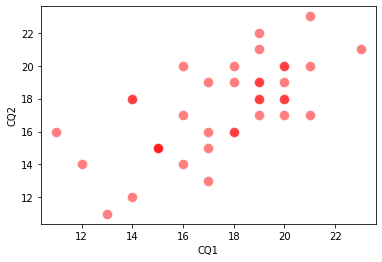

In [6]:
# visualisasi pesebaran data
sns.scatterplot(x="CQ1", y="CQ2", data=df, s=100, color="red", alpha = 0.5)



In [7]:
df_x = df.iloc[:, 1:4]
df_x.head()

,CQ1,CQ2
0,13,11
1,20,19
2,15,15
3,16,20
4,19,21


In [8]:
# Mengubah Variabel Data Frame Menjadi Array
df_array =  np.array(df_x)
print(df_array)

[[13 11]
 [20 19]
 [15 15]
 [16 20]
 [19 21]
 [19 17]
 [12 14]
 [14 12]
 [18 16]
 [15 15]
 [19 18]
 [23 21]
 [17 16]
 [17 19]
 [17 15]
 [20 18]
 [18 20]
 [21 20]
 [20 20]
 [20 17]
 [14 18]
 [19 19]
 [18 19]
 [21 23]
 [20 20]
 [21 17]
 [19 18]
 [15 15]
 [17 13]
 [16 14]
 [11 16]
 [14 18]
 [20 18]
 [16 17]
 [18 16]
 [19 19]
 [19 22]]


In [9]:
# Menstandarkan Ukuran Variabel
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(df_array)
x_scaled

array([[0.16666667, 0.        ],
       [0.75      , 0.66666667],
       [0.33333333, 0.33333333],
       [0.41666667, 0.75      ],
       [0.66666667, 0.83333333],
       [0.66666667, 0.5       ],
       [0.08333333, 0.25      ],
       [0.25      , 0.08333333],
       [0.58333333, 0.41666667],
       [0.33333333, 0.33333333],
       [0.66666667, 0.58333333],
       [1.        , 0.83333333],
       [0.5       , 0.41666667],
       [0.5       , 0.66666667],
       [0.5       , 0.33333333],
       [0.75      , 0.58333333],
       [0.58333333, 0.75      ],
       [0.83333333, 0.75      ],
       [0.75      , 0.75      ],
       [0.75      , 0.5       ],
       [0.25      , 0.58333333],
       [0.66666667, 0.66666667],
       [0.58333333, 0.66666667],
       [0.83333333, 1.        ],
       [0.75      , 0.75      ],
       [0.83333333, 0.5       ],
       [0.66666667, 0.58333333],
       [0.33333333, 0.33333333],
       [0.5       , 0.16666667],
       [0.41666667, 0.25      ],
       [0.

#Proses Clustering dengan K-Means

In [10]:
# Menentukan dan mengkonfigurasi fungsi kmeans
kmeans = KMeans(n_clusters = 2, random_state=12)
# Menentukan dan menghitung kluster dari data
kmeans.fit(x_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=12, tol=0.0001, verbose=0)

In [11]:
# Menampilkan pusat cluster
kmeans.cluster_centers_

array([[0.34375   , 0.33854167],
       [0.70238095, 0.69047619]])

In [12]:
# Menampilkan Hasil Kluster 
print(kmeans.labels_)
# Menambahkan Kolom "kluster" Dalam Data Frame Driver 
df["cluster"] = kmeans.labels_
df.head(38)

[0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 0 0 1 0 0 1 1]


,NPM,CQ1,CQ2,cluster
0,18081010128,13,11,0
1,18081010067,20,19,1
2,18081010059,15,15,0
3,18081010113,16,20,1
4,18081010132,19,21,1
5,17081010075,19,17,1
6,17081010098,12,14,0
7,17081010102,14,12,0
8,18081010077,18,16,0
9,19081010003,15,15,0


In [13]:
# download dataframe
from google.colab import files
df.to_csv('kel10.csv')
files.download("kel10.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

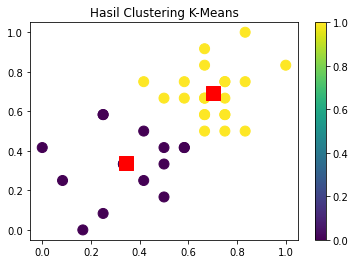

In [14]:
# Memvisualkan hasil kluster
output = plt.scatter(x_scaled[:,0], x_scaled[:,1], s = 100, c = df.cluster, marker = "o", alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='red', s=200, alpha=1 , marker="s");
plt.title("Hasil Clustering K-Means")
plt.colorbar (output)
plt.show()

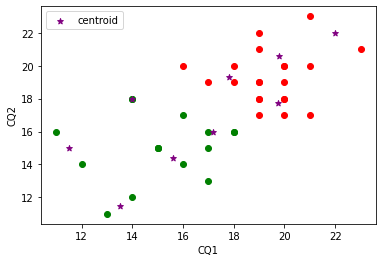

In [ ]:
#visualisasi pesebaran data 2
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
plt.scatter(df1.CQ1,df1.CQ2,color='green') 
plt.scatter(df2.CQ1,df2.CQ2,color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('CQ1')
plt.ylabel('CQ2')
plt.legend()

In [15]:
# ELBOW PLOT menghitung jumlah klaster yang optimal k
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['CQ1','CQ2']])
    sse.append(km.inertia_)

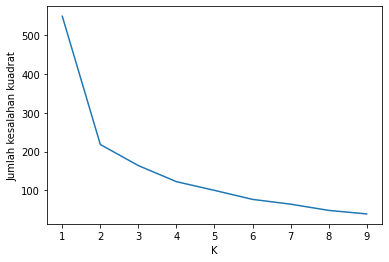

In [16]:
plt.xlabel('K')
plt.ylabel('Jumlah kesalahan kuadrat')
plt.plot(k_rng,sse)